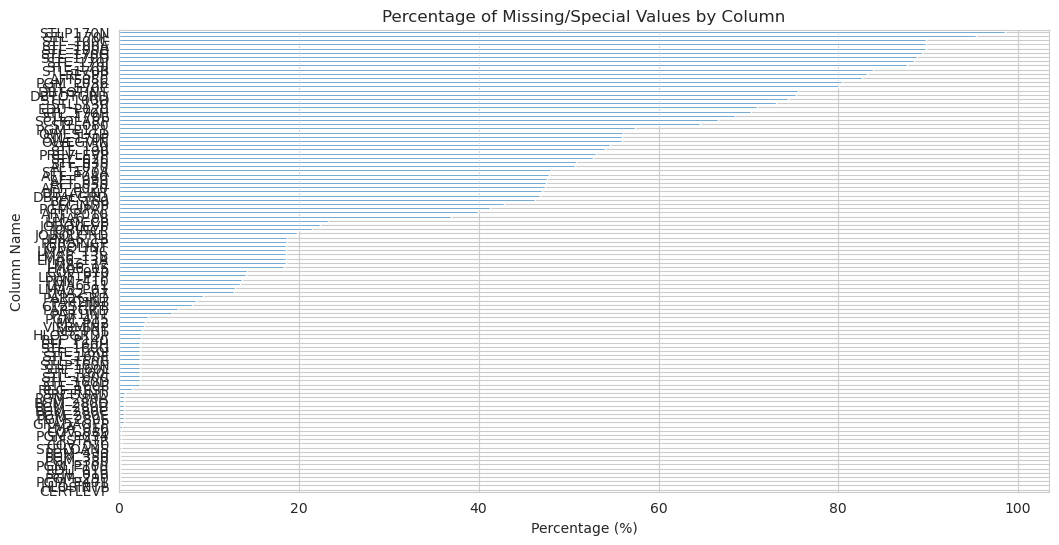


=== Demographic Analysis ===

Gender Distribution (%):
GENDER2
Women+    58.030735
Men+      41.969265
Name: proportion, dtype: float64


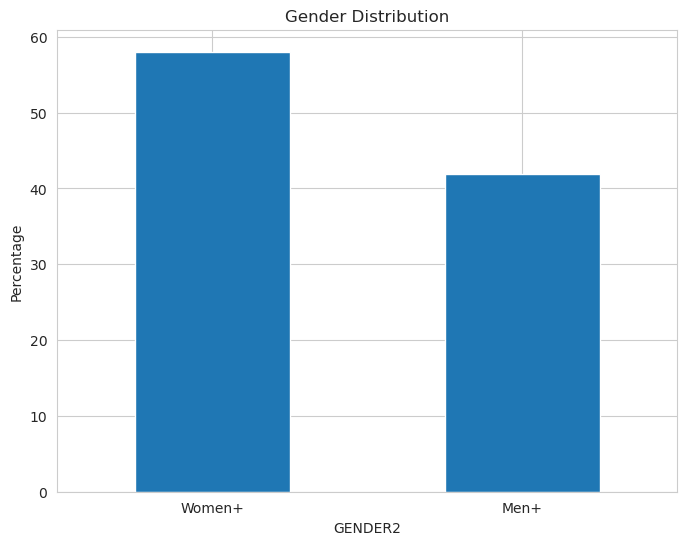


Visible Minority Status (%):
VISBMINP
No     63.721553
Yes    36.278447
Name: proportion, dtype: float64


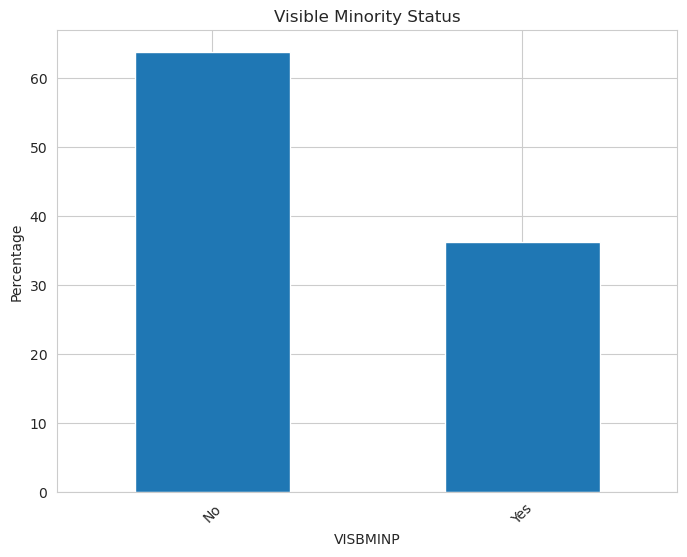


Age at Graduation Distribution Summary:
count    16056.000000
mean         1.967551
std          1.054128
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: GRADAGEP, dtype: float64


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


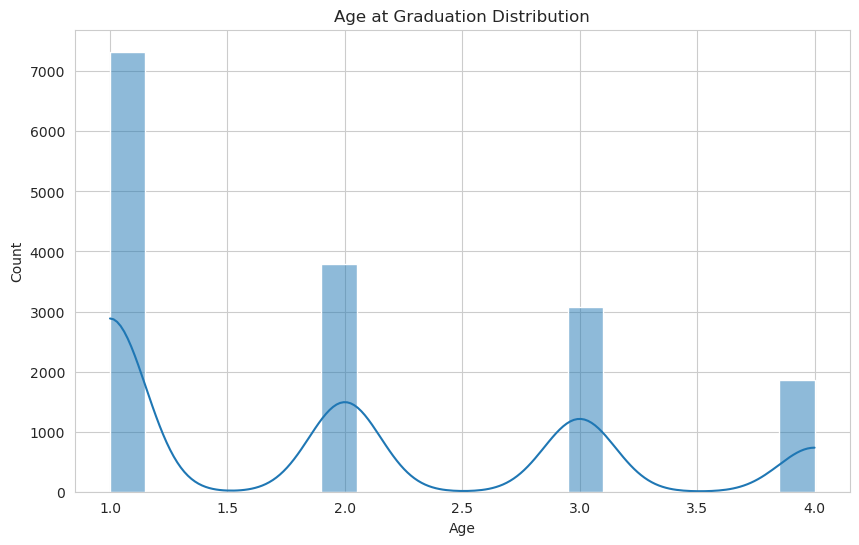


=== Education Analysis ===

Program Level Distribution (%):
CERTLEVP
Bachelor's            41.841730
College               29.720518
Master's/Doctorate    28.437752
Name: proportion, dtype: float64


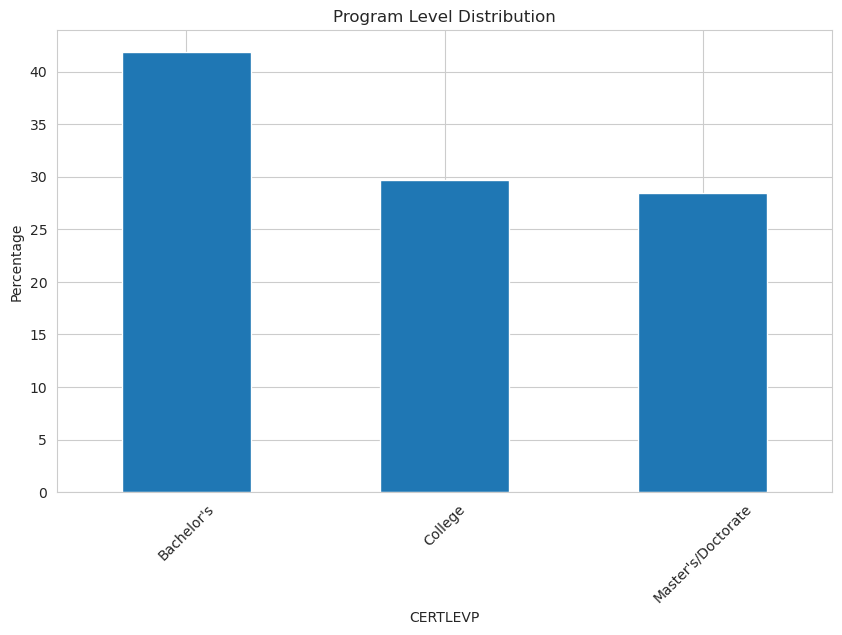


Would Choose Same Field of Study Again (%):
PGM_430
Yes    73.971583
No     26.028417
Name: proportion, dtype: float64


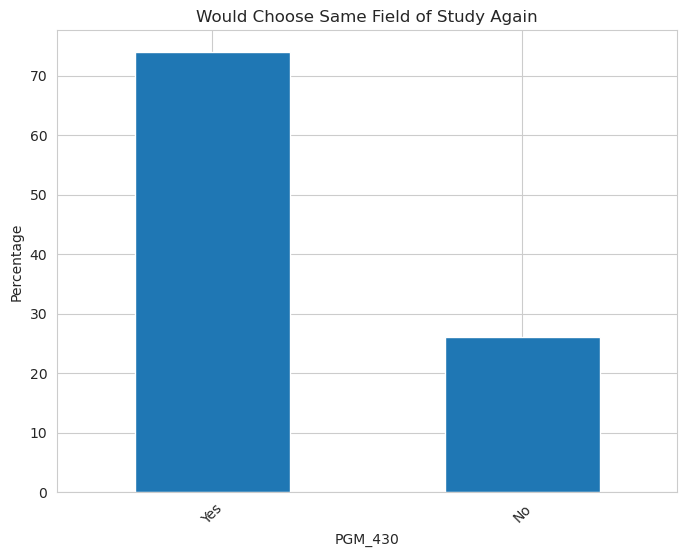


=== Financial Analysis ===

Student Loan Distribution (%):
STULOANS
No     54.382371
Yes    45.617629
Name: proportion, dtype: float64


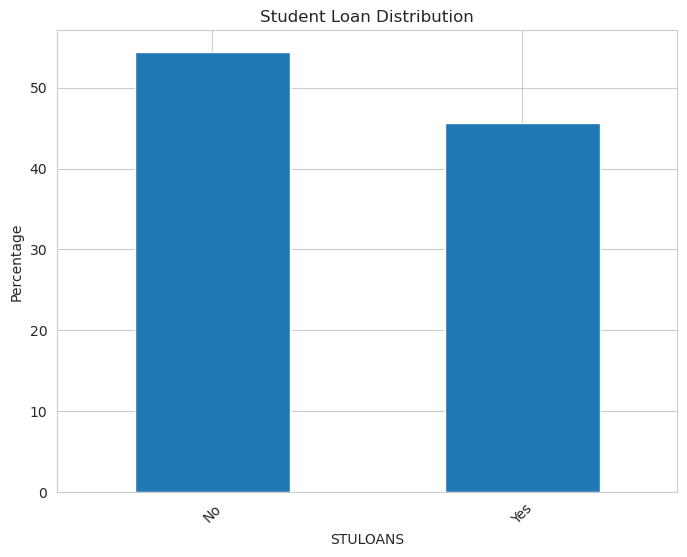


Personal Income Category Distribution (%):
PERSINCP
3.0    24.242193
2.0    21.667936
1.0    21.218583
5.0    16.877380
4.0    15.993907
Name: proportion, dtype: float64


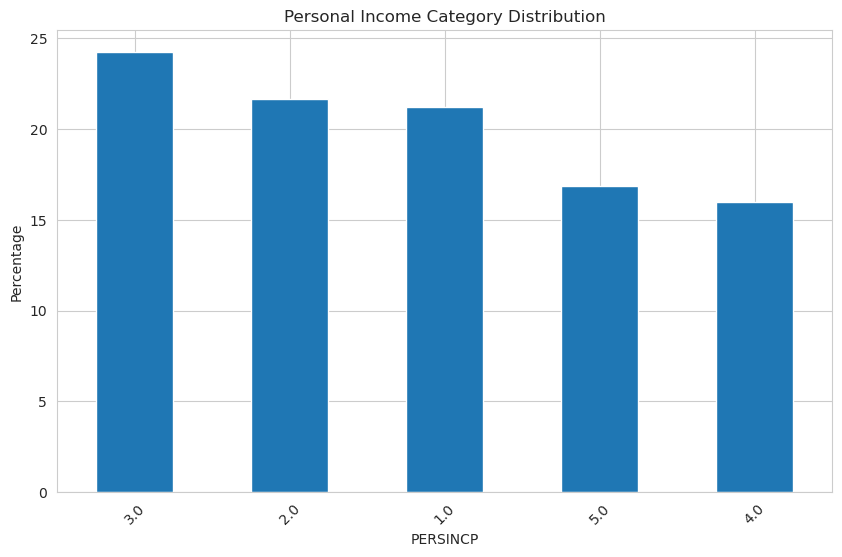


=== Employment Analysis ===

Labor Force Status (%):
LFSTATP
Employed              87.730518
Not in labor force     7.122012
Unemployed             5.147470
Name: proportion, dtype: float64


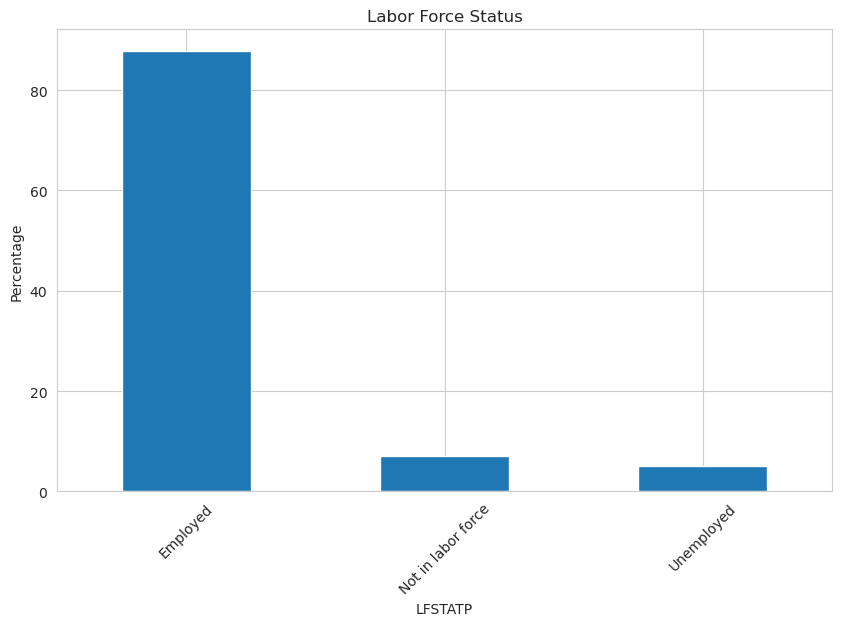


Job Income Category Distribution (%):
JOBINCP
3.0    30.958018
2.0    21.835543
4.0    20.872790
5.0    17.597854
1.0     8.735795
Name: proportion, dtype: float64


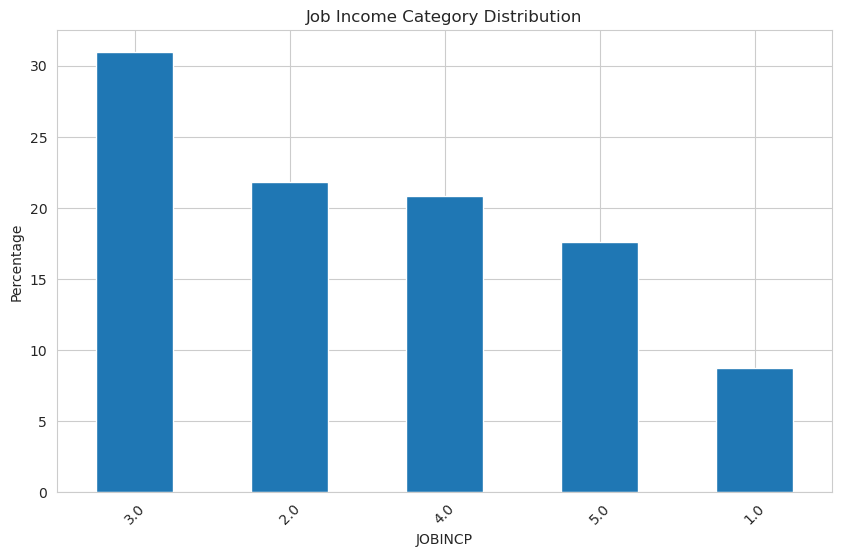


Job-Education Relatedness (%):
LMA6_11
Very related        63.145456
Somewhat related    20.969706
Not related         15.884839
Name: proportion, dtype: float64


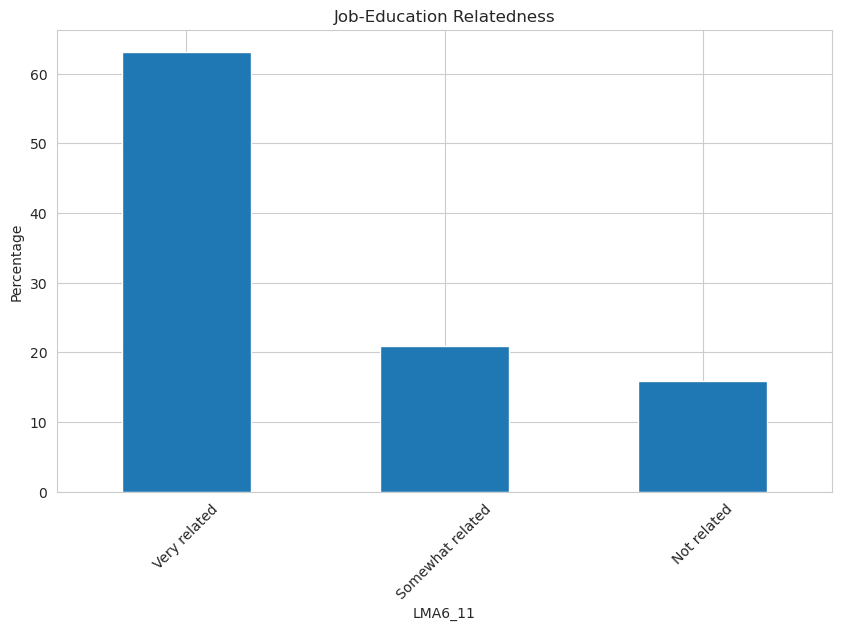


=== COVID-19 Impact Analysis ===

Program Completion Delayed Due to COVID-19 (%):
COV_010
No     83.416432
Yes    16.583568
Name: proportion, dtype: float64


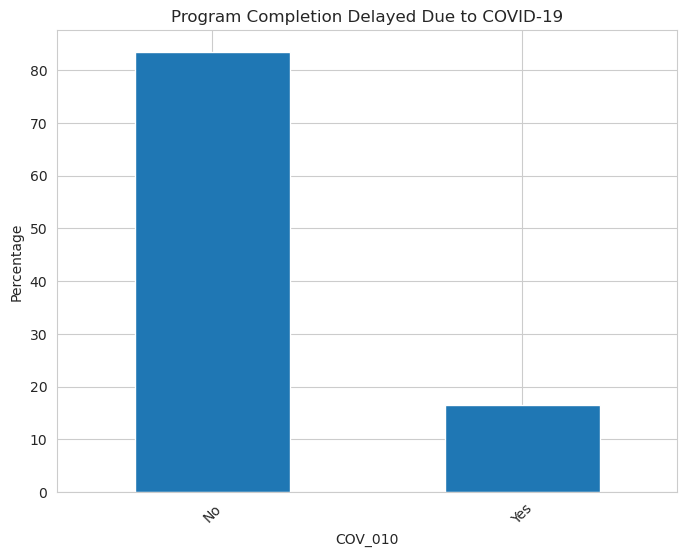


=== Predictive Modeling: Student Loan Prediction ===

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.39      0.45      1793
           1       0.58      0.70      0.63      2119

    accuracy                           0.56      3912
   macro avg       0.55      0.55      0.54      3912
weighted avg       0.55      0.56      0.55      3912



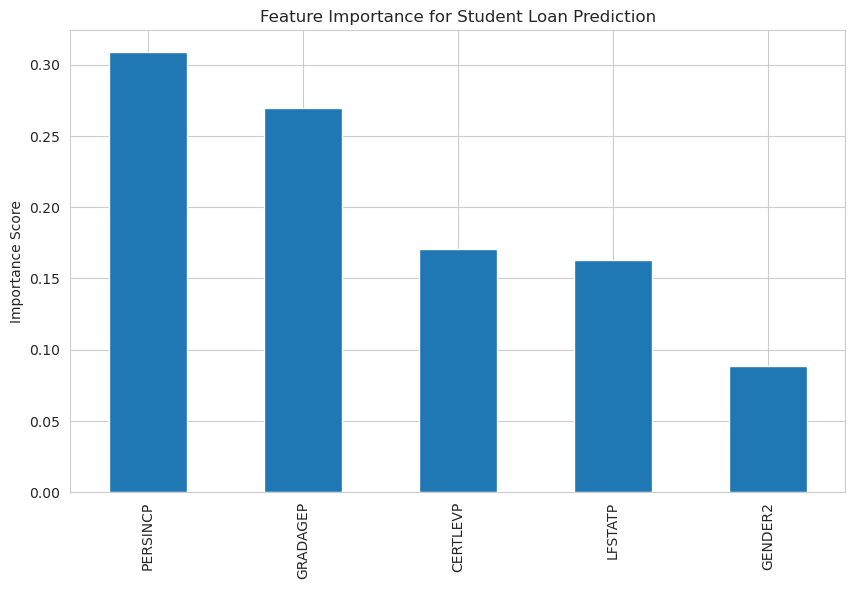


=== Correlation Analysis ===



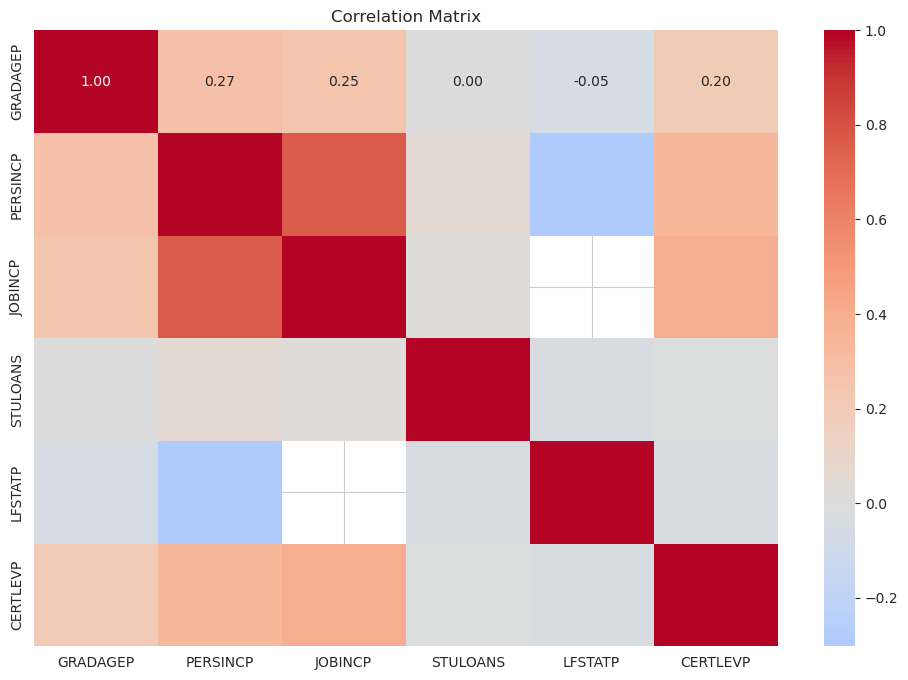

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Set style for visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the actual data
df = pd.read_csv('ngs2020.csv')

# Define missing value codes based on the data documentation
missing_codes = [6, 7, 8, 9, 96, 97, 98, 99]

# Create a function to visualize missing data
def plot_missing_data(df):
    missing = df.isin(missing_codes).mean() * 100
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    
    plt.figure(figsize=(12, 6))
    missing.plot(kind='barh')
    plt.title('Percentage of Missing/Special Values by Column')
    plt.xlabel('Percentage (%)')
    plt.ylabel('Column Name')
    plt.show()

plot_missing_data(df)

# Data cleaning - replace missing codes with NaN
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].replace(missing_codes, np.nan)

# Demographic Analysis
def demographic_analysis(df):
    print("\n=== Demographic Analysis ===\n")
    
    # Gender distribution
    if 'GENDER2' in df.columns:
        gender_mapping = {
            1: 'Men+',
            2: 'Women+',
            6: 'Valid skip',
            7: 'Don\'t know',
            8: 'Refusal',
            9: 'Not stated'
        }
        gender_dist = df['GENDER2'].map(gender_mapping).value_counts(normalize=True) * 100
        print("Gender Distribution (%):")
        print(gender_dist)
        
        plt.figure(figsize=(8, 6))
        gender_dist.plot(kind='bar')
        plt.title('Gender Distribution')
        plt.ylabel('Percentage')
        plt.xticks(rotation=0)
        plt.show()
    
    # Visible minority status
    if 'VISBMINP' in df.columns:
        minority_mapping = {
            1: 'Yes',
            2: 'No',
            3: 'Not applicable',
            6: 'Valid skip',
            7: 'Don\'t know',
            8: 'Refusal',
            9: 'Not stated'
        }
        minority_dist = df['VISBMINP'].map(minority_mapping).value_counts(normalize=True) * 100
        print("\nVisible Minority Status (%):")
        print(minority_dist)
        
        plt.figure(figsize=(8, 6))
        minority_dist.plot(kind='bar')
        plt.title('Visible Minority Status')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)
        plt.show()
    
    # Age distribution (assuming GRADAGEP is age at graduation)
    if 'GRADAGEP' in df.columns:
        print("\nAge at Graduation Distribution Summary:")
        print(df['GRADAGEP'].describe())
        
        plt.figure(figsize=(10, 6))
        sns.histplot(df['GRADAGEP'].dropna(), bins=20, kde=True)
        plt.title('Age at Graduation Distribution')
        plt.xlabel('Age')
        plt.ylabel('Count')
        plt.show()

demographic_analysis(df)

# Education Analysis
def education_analysis(df):
    print("\n=== Education Analysis ===\n")
    
    # Program level distribution
    if 'CERTLEVP' in df.columns:
        certlev_mapping = {
            1: 'College',
            2: 'Bachelor\'s',
            3: 'Master\'s/Doctorate',
            6: 'Valid skip',
            7: 'Don\'t know',
            8: 'Refusal',
            9: 'Not stated'
        }
        program_level = df['CERTLEVP'].map(certlev_mapping).value_counts(normalize=True) * 100
        print("Program Level Distribution (%):")
        print(program_level)
        
        plt.figure(figsize=(10, 6))
        program_level.plot(kind='bar')
        plt.title('Program Level Distribution')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)
        plt.show()
    
    # Would choose same field of study again
    if 'PGM_430' in df.columns:
        field_choice_mapping = {
            1: 'Yes',
            2: 'No',
            6: 'Valid skip',
            7: 'Don\'t know',
            8: 'Refusal',
            9: 'Not stated'
        }
        field_choice = df['PGM_430'].map(field_choice_mapping).value_counts(normalize=True) * 100
        print("\nWould Choose Same Field of Study Again (%):")
        print(field_choice)
        
        plt.figure(figsize=(8, 6))
        field_choice.plot(kind='bar')
        plt.title('Would Choose Same Field of Study Again')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)
        plt.show()

education_analysis(df)

# Financial Analysis
def financial_analysis(df):
    print("\n=== Financial Analysis ===\n")
    
    # Student loan distribution
    if 'STULOANS' in df.columns:
        loans_mapping = {
            1: 'Yes',
            2: 'No',
            6: 'Valid skip',
            7: 'Don\'t know',
            8: 'Refusal',
            9: 'Not stated'
        }
        loans = df['STULOANS'].map(loans_mapping).value_counts(normalize=True) * 100
        print("Student Loan Distribution (%):")
        print(loans)
        
        plt.figure(figsize=(8, 6))
        loans.plot(kind='bar')
        plt.title('Student Loan Distribution')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)
        plt.show()
    
    # Personal income distribution
    if 'PERSINCP' in df.columns:
        # Convert to actual income values if possible
        # For now, just show the distribution of categories
        persincp_dist = df['PERSINCP'].value_counts(normalize=True) * 100
        print("\nPersonal Income Category Distribution (%):")
        print(persincp_dist)
        
        plt.figure(figsize=(10, 6))
        persincp_dist.plot(kind='bar')
        plt.title('Personal Income Category Distribution')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)
        plt.show()

financial_analysis(df)

# Employment Analysis
def employment_analysis(df):
    print("\n=== Employment Analysis ===\n")
    
    # Labor force status
    if 'LFSTATP' in df.columns:
        lfstat_mapping = {
            1: 'Employed',
            2: 'Unemployed',
            3: 'Not in labor force',
            6: 'Valid skip',
            7: 'Don\'t know',
            8: 'Refusal',
            9: 'Not stated'
        }
        labor_status = df['LFSTATP'].map(lfstat_mapping).value_counts(normalize=True) * 100
        print("Labor Force Status (%):")
        print(labor_status)
        
        plt.figure(figsize=(10, 6))
        labor_status.plot(kind='bar')
        plt.title('Labor Force Status')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)
        plt.show()
    
    # Job income distribution
    if 'JOBINCP' in df.columns:
        # Convert to actual income values if possible
        # For now, just show the distribution of categories
        job_income = df['JOBINCP'].value_counts(normalize=True) * 100
        print("\nJob Income Category Distribution (%):")
        print(job_income)
        
        plt.figure(figsize=(10, 6))
        job_income.plot(kind='bar')
        plt.title('Job Income Category Distribution')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)
        plt.show()
    
    # Job-education relatedness
    if 'LMA6_11' in df.columns:
        relatedness_mapping = {
            1: 'Very related',
            2: 'Somewhat related',
            3: 'Not related',
            6: 'Valid skip',
            7: 'Don\'t know',
            8: 'Refusal',
            9: 'Not stated'
        }
        relatedness = df['LMA6_11'].map(relatedness_mapping).value_counts(normalize=True) * 100
        print("\nJob-Education Relatedness (%):")
        print(relatedness)
        
        plt.figure(figsize=(10, 6))
        relatedness.plot(kind='bar')
        plt.title('Job-Education Relatedness')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)
        plt.show()

employment_analysis(df)

# COVID-19 Impact Analysis
def covid_analysis(df):
    print("\n=== COVID-19 Impact Analysis ===\n")
    
    # Program completion delayed
    if 'COV_010' in df.columns:
        delayed_mapping = {
            1: 'Yes',
            2: 'No',
            6: 'Valid skip',
            7: 'Don\'t know',
            8: 'Refusal',
            9: 'Not stated'
        }
        delayed = df['COV_010'].map(delayed_mapping).value_counts(normalize=True) * 100
        print("Program Completion Delayed Due to COVID-19 (%):")
        print(delayed)
        
        plt.figure(figsize=(8, 6))
        delayed.plot(kind='bar')
        plt.title('Program Completion Delayed Due to COVID-19')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)
        plt.show()

covid_analysis(df)

# Predictive Modeling Example: Predict Student Loans
def predict_student_loans(df):
    print("\n=== Predictive Modeling: Student Loan Prediction ===\n")
    
    # Prepare data
    model_df = df[['GENDER2', 'CERTLEVP', 'PERSINCP', 'LFSTATP', 'STULOANS', 'GRADAGEP']].copy()
    model_df = model_df.dropna()
    
    # Filter out missing codes from the target variable
    model_df = model_df[model_df['STULOANS'].isin([1, 2])]
    
    # Convert categorical variables to numerical
    le = LabelEncoder()
    for col in ['GENDER2', 'CERTLEVP', 'PERSINCP', 'LFSTATP', 'STULOANS']:
        model_df[col] = le.fit_transform(model_df[col])
    
    # Split data
    X = model_df.drop('STULOANS', axis=1)
    y = model_df['STULOANS']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Feature importance
    importance = pd.Series(model.feature_importances_, index=X.columns)
    importance = importance.sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    importance.plot(kind='bar')
    plt.title('Feature Importance for Student Loan Prediction')
    plt.ylabel('Importance Score')
    plt.show()

# Only run if we have enough data
if len(df.dropna(subset=['STULOANS', 'GENDER2', 'CERTLEVP', 'PERSINCP', 'LFSTATP', 'GRADAGEP'])) > 100:
    predict_student_loans(df)
else:
    print("Not enough complete data for predictive modeling example.")

# Correlation Analysis
def correlation_analysis(df):
    print("\n=== Correlation Analysis ===\n")
    
    # Select columns that might have meaningful correlations
    corr_cols = [
        'GRADAGEP',
        'PERSINCP',
        'JOBINCP',
        'STULOANS',
        'LFSTATP',
        'CERTLEVP'
    ]
    corr_df = df[corr_cols].copy()
    
    # Filter out missing codes
    for col in corr_cols:
        corr_df = corr_df[~corr_df[col].isin(missing_codes)]
    
    # Compute correlation matrix
    corr_matrix = corr_df.corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        center=0,
        fmt=".2f"
    )
    plt.title('Correlation Matrix')
    plt.show()

correlation_analysis(df)